In [9]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn import svm
from sklearn import metrics
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [3]:
airflight = pd.read_csv("airflight2.csv")
airflight = airflight[airflight.Month !=1]
airflight = airflight[airflight.DayOfWeek == 1]
target = DataFrame(airflight['ArrDelay'])
airflight = airflight.drop(['ArrDelay','UniqueCarrier','TailNum','Origin','Dest','CancellationCode',
                            'Month','DayOfWeek','DepDelay'],axis=1)
airflight = airflight.fillna(0)
target = target.fillna(0)

In [34]:
target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63358 entries, 609392 to 1048573
Data columns (total 1 columns):
ArrDelay    63358 non-null float64
dtypes: float64(1)
memory usage: 990.0 KB


In [6]:
airflight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63358 entries, 609392 to 1048573
Data columns (total 22 columns):
Month                63358 non-null int64
DayofMonth           63358 non-null int64
DayOfWeek            63358 non-null int64
DepTime              63358 non-null float64
CRSDepTime           63358 non-null int64
ArrTime              63358 non-null float64
CRSArrTime           63358 non-null int64
FlightNum            63358 non-null int64
ActualElapsedTime    63358 non-null float64
CRSElapsedTime       63358 non-null float64
AirTime              63358 non-null float64
DepDelay             63358 non-null float64
Distance             63358 non-null int64
TaxiIn               63358 non-null float64
TaxiOut              63358 non-null float64
Cancelled            63358 non-null int64
Diverted             63358 non-null int64
CarrierDelay         63358 non-null float64
WeatherDelay         63358 non-null float64
NASDelay             63358 non-null float64
SecurityDelay        6

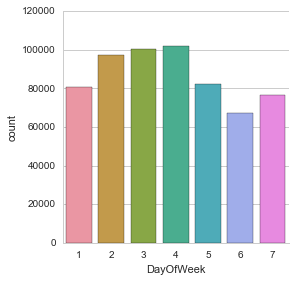

In [5]:
sns.factorplot('DayOfWeek',data=airflight,kind="count")

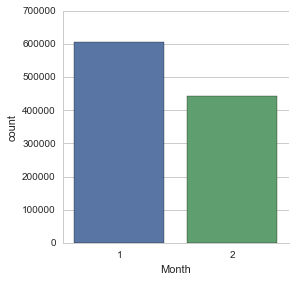

In [32]:
sns.factorplot('Month',data=airflight,kind="count")

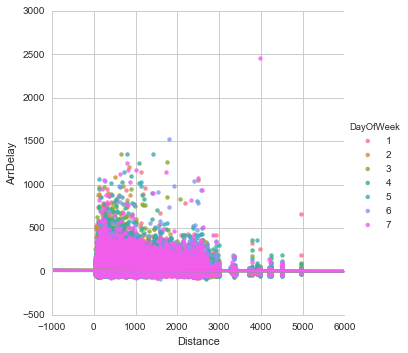

In [14]:
sns.lmplot('Distance','ArrDelay',hue ="DayOfWeek",data=airflight)

In [10]:
X_train,X_test, y_train,y_test = train_test_split(airflight,target)

In [11]:
clf0 = LinearRegression()
clf1 = RandomForestRegressor()
clf2 = GaussianNB()
clf3 = GradientBoostingRegressor()

for clf, label in zip([clf0,clf1,clf2,clf3] , ['Linear Regression','Random Forest','Naive Bayes','Gradient Boosting Machine']):
    clf.fit(X_train,y_train)
    MAE = mean_absolute_error(y_test,clf.predict(X_test))
    print("Mean Absolute Error: %0.2f [%s]" %(MAE,label))

Mean Absolute Error: 5.66 [Linear Regression]
Mean Absolute Error: 4.10 [Random Forest]
Mean Absolute Error: 37.67 [Naive Bayes]
Mean Absolute Error: 5.92 [Gradient Boosting Machine]


In [56]:
importances = pd.Series(clf1.feature_importances_, index=airflight.columns)
print (importances.order(ascending=False)[:10])

LateAircraftDelay    0.382916
CarrierDelay         0.281757
NASDelay             0.220366
WeatherDelay         0.072769
CRSElapsedTime       0.009075
ActualElapsedTime    0.008709
TaxiOut              0.003970
FlightNum            0.002968
Distance             0.002818
ArrTime              0.002810
dtype: float64


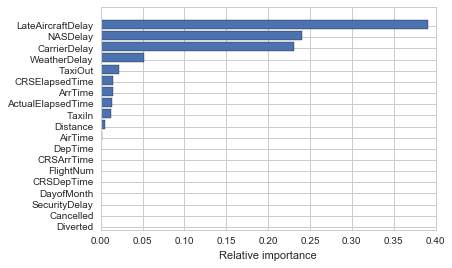

In [57]:
indicies = np.argsort(est.feature_importances_)
plt.barh(np.arange(len(airflight.columns)), est.feature_importances_[indicies])
plt.yticks(np.arange(len(airflight.columns)) + 0.25, np.array(airflight.columns)[indicies])
_=plt.xlabel('Relative importance')